In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
epoch_key = ('Roqui', 5, 2)

In [4]:
from src.parameters import ANIMALS
from src.load_data import (
    _get_pos_dataframe, make_track_graph, classify_track_segments,
    calculate_linear_distance, convert_linear_distance_to_linear_position)

position_info = _get_pos_dataframe(epoch_key, ANIMALS)

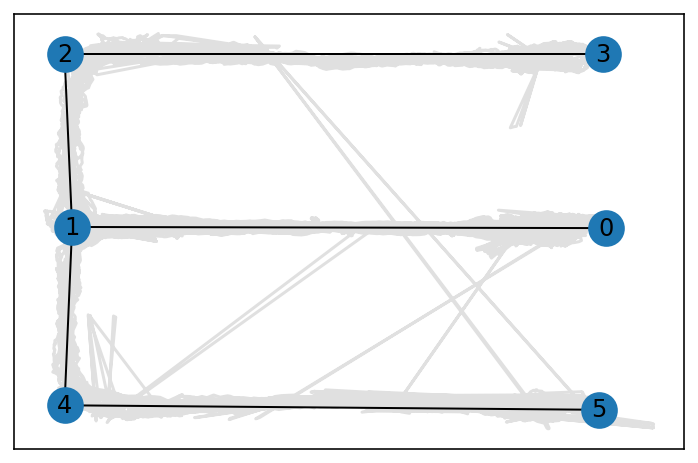

In [51]:
from loren_frank_data_processing.track_segment_classification import plot_track

track_graph, center_well_id = make_track_graph(epoch_key, ANIMALS)
position = position_info.loc[:, [
    'tailBase_x', 'tailBase_y']].values

fig, ax = plt.subplots()
plot_track(track_graph, ax=ax)
plt.plot(position[:, 0], position[:, 1], color='lightgrey', alpha=0.7, zorder=-1);

In [53]:
track_segment_id = classify_track_segments(
    track_graph, position,
    route_euclidean_distance_scaling=1E-1,
    sensor_std_dev=10)
track_segment_id = pd.DataFrame(
    track_segment_id, index=position_info.index)

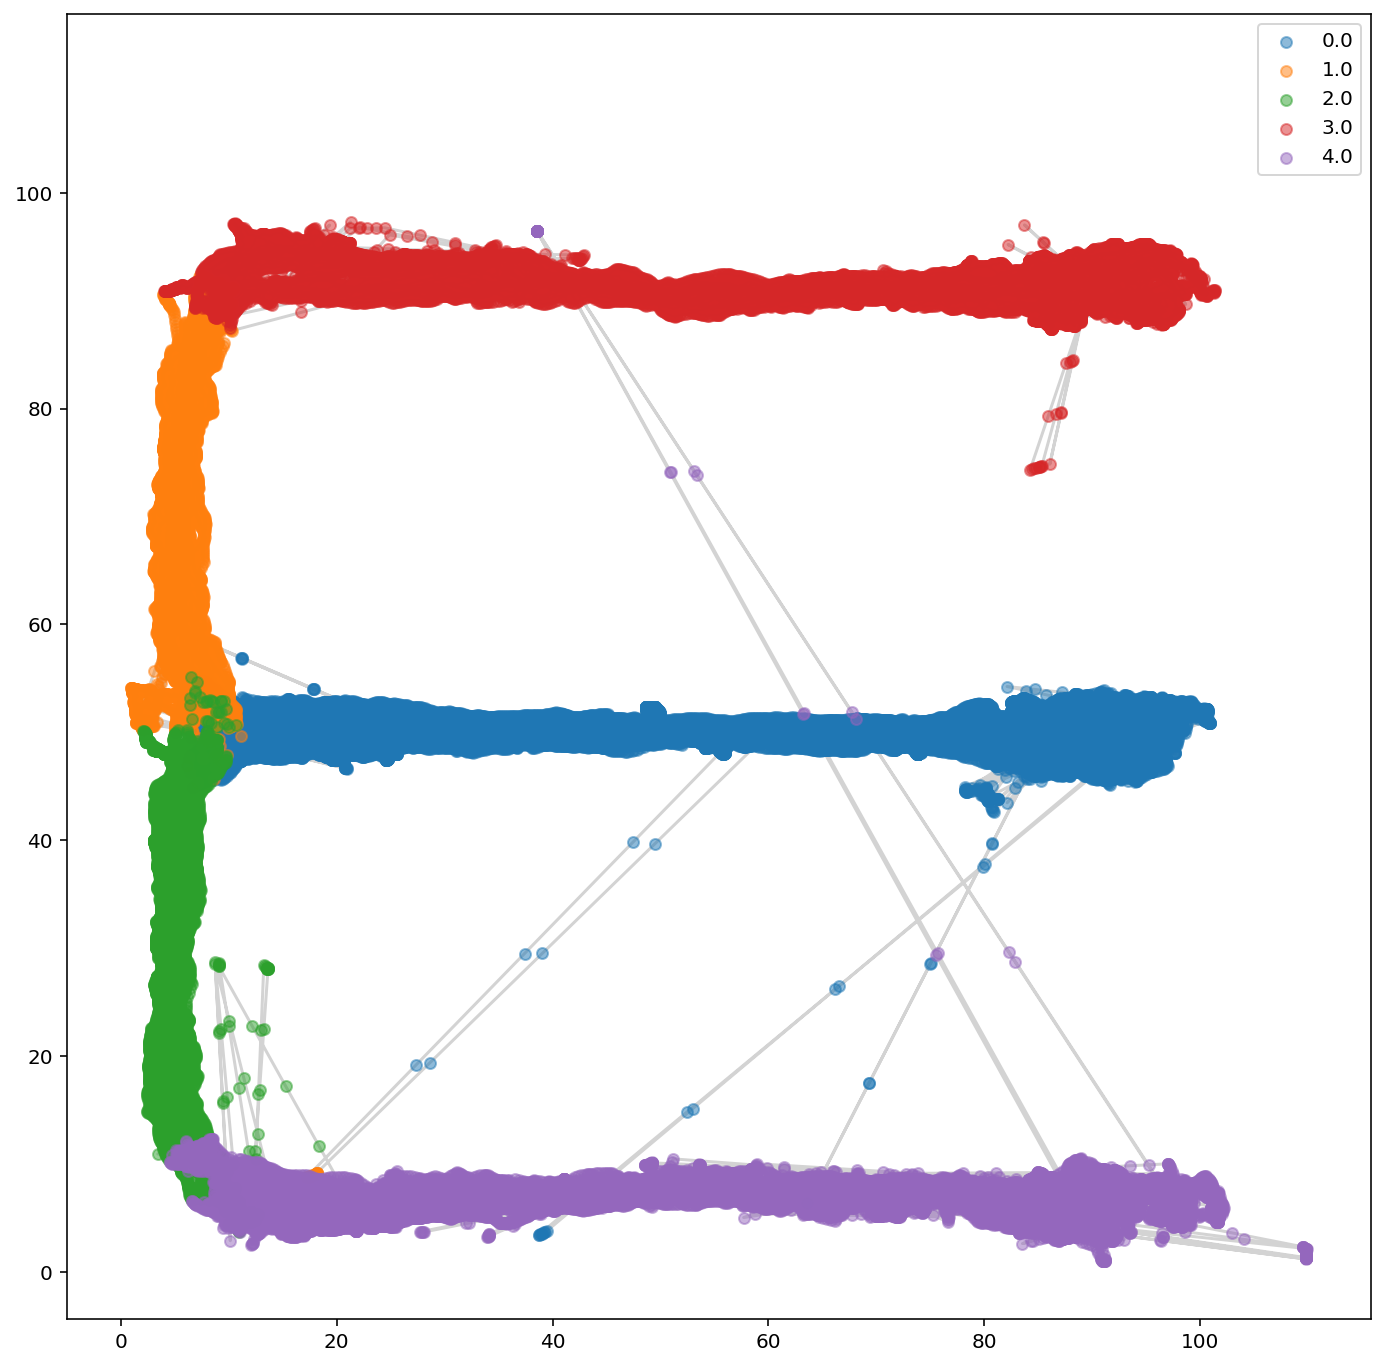

In [54]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(position[:, 0], position[:, 1], color='lightgrey', alpha=1, zorder=-1);
for edge_label, df in position_info.groupby(track_segment_id.values.squeeze()):
    ax.scatter(df.tailBase_x, df.tailBase_y, s=30, alpha=0.5, label=edge_label)
plt.legend()
plt.axis('square');

In [55]:
position_info['linear_distance'] = calculate_linear_distance(
    track_graph, track_segment_id.values.squeeze(), center_well_id,
    position)

In [56]:
center_well_id

0

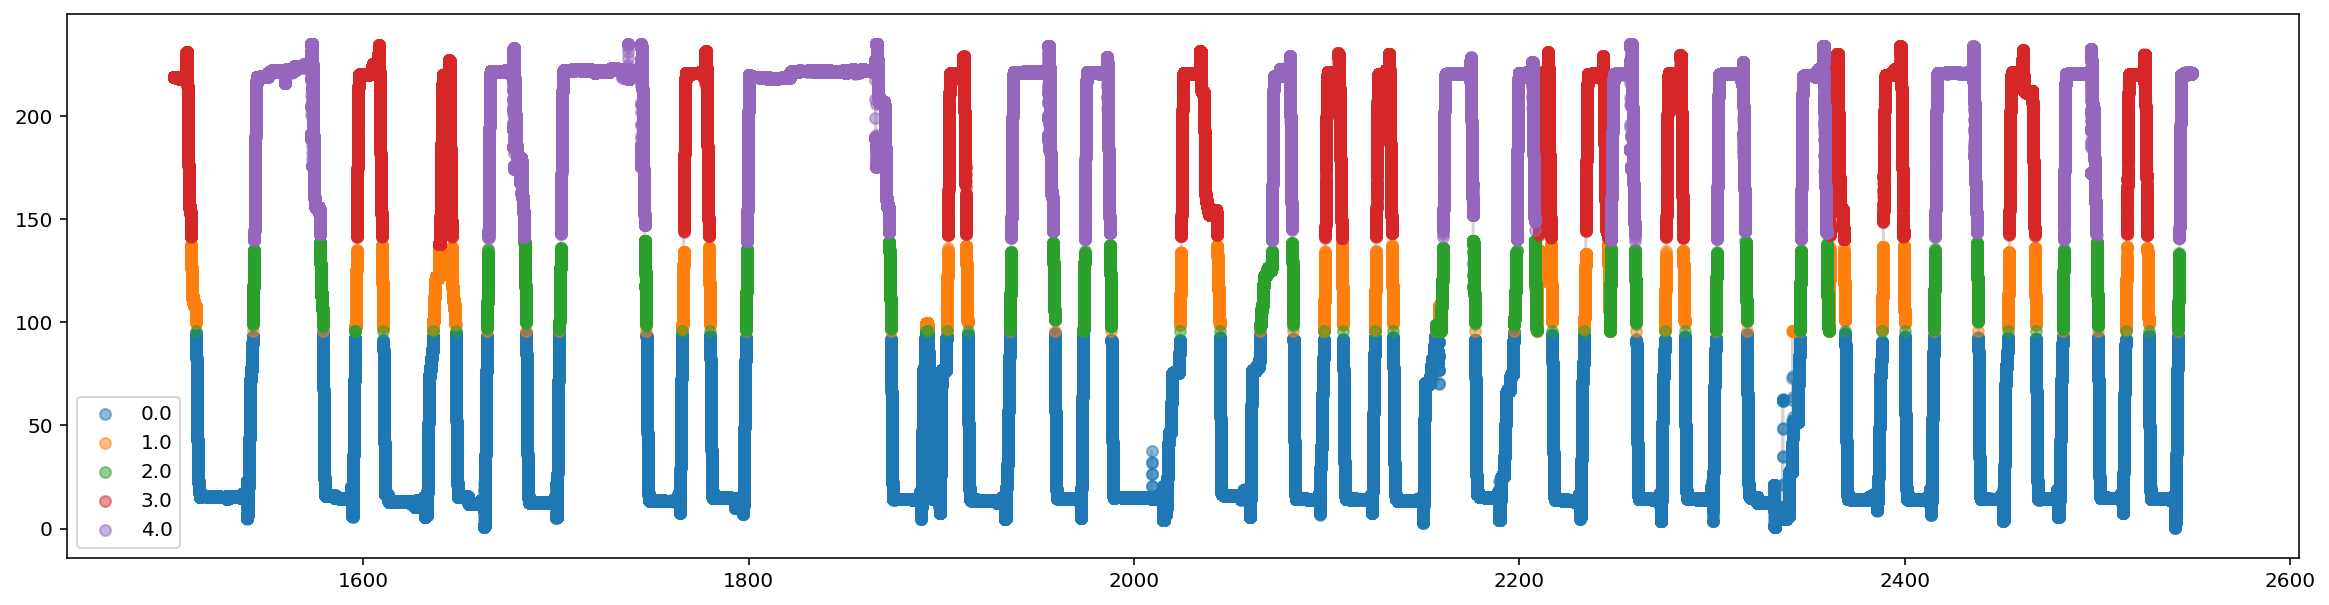

In [57]:
fig, ax = plt.subplots(figsize=(20, 5))

time = position_info.index / np.timedelta64(1, 's')
ax.plot(time, position_info.linear_distance, color='lightgrey', alpha=1, zorder=-1);
for edge_label, df in position_info.groupby(track_segment_id.values.squeeze()):
    ax.scatter(df.index / np.timedelta64(1, 's'), df.linear_distance, s=30, alpha=0.5, label=edge_label)
plt.legend()

In [58]:
EDGE_ORDER = [0, 1, 3, 2, 4]
EDGE_SPACING = [0, 0, 0, 0]

linear_position = convert_linear_distance_to_linear_position(
        position_info.linear_distance.values,
        track_segment_id.squeeze(), EDGE_ORDER,
        spacing=EDGE_SPACING)

In [59]:
linear_position = pd.DataFrame(
    linear_position, index=position_info.index)

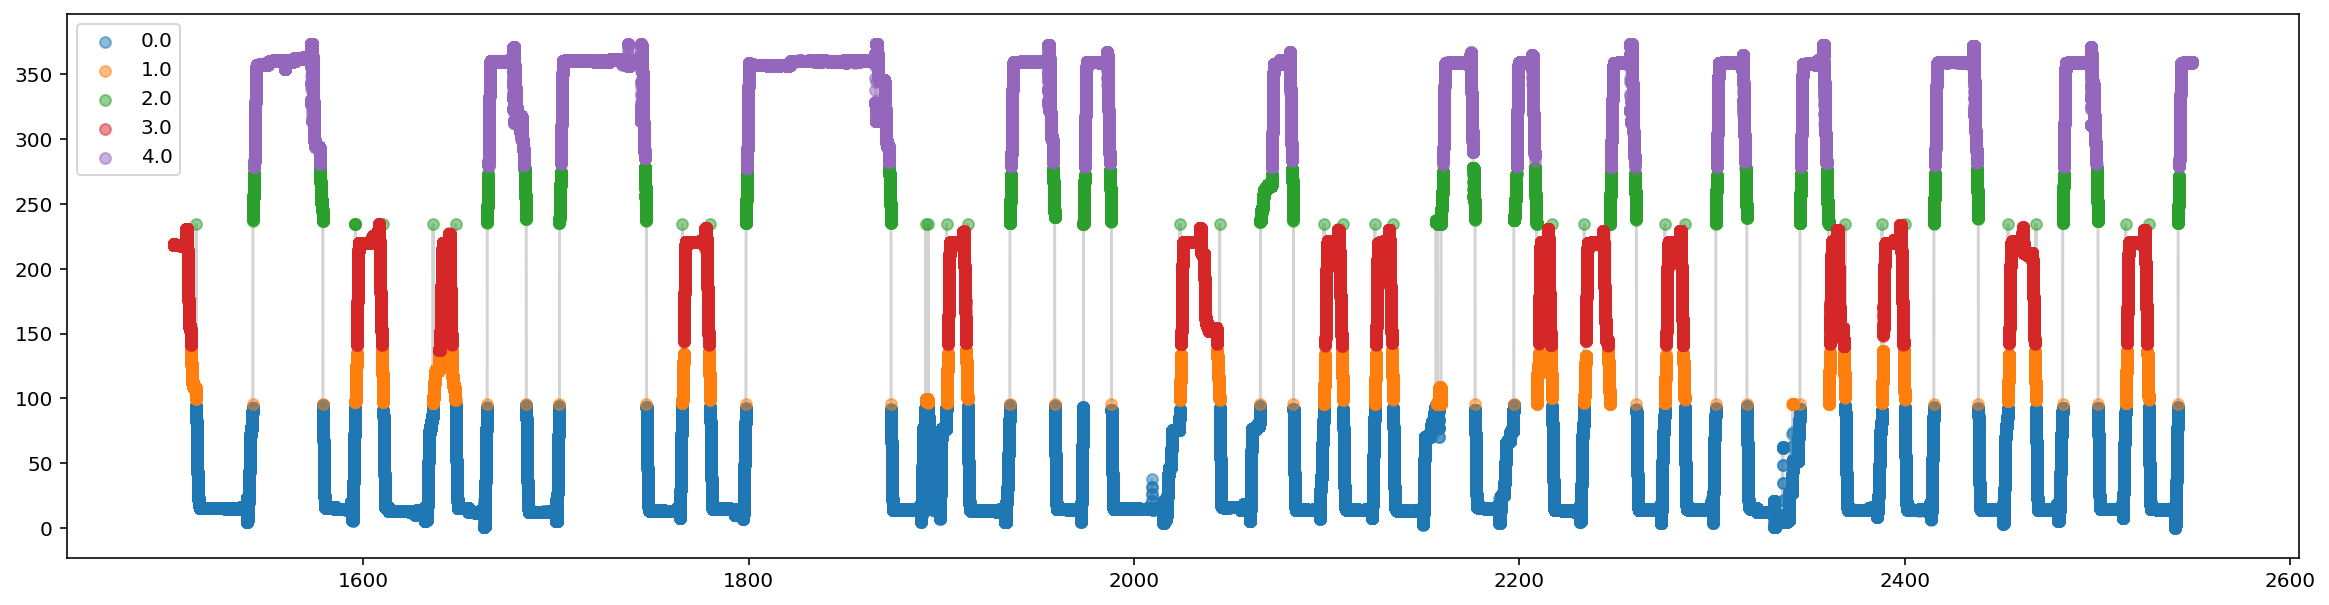

In [60]:
fig, ax = plt.subplots(figsize=(20, 5))

time = position_info.index / np.timedelta64(1, 's')
ax.plot(time, linear_position.values, color='lightgrey', alpha=1, zorder=-1);
for edge_label, df in linear_position.groupby(track_segment_id.values.squeeze()):
    ax.scatter(df.index / np.timedelta64(1, 's'), df, s=30, alpha=0.5, label=edge_label)
plt.legend()

In [61]:
linear_position = linear_position.values

In [62]:
position_info

,nose_x,nose_y,nose_vel,tailBase_x,tailBase_y,tailBase_vel,tailMid_x,tailMid_y,tailMid_vel,tailTip_x,...,forepawR_vel,hindpawL_x,hindpawL_y,hindpawL_vel,hindpawR_x,hindpawR_y,hindpawR_vel,linear_distance,track_segment_id,linear_position
time,,,,,,,,,,,,,,,,,,,,,
00:25:01.474544,106.024191,90.565393,-19.466150,85.426632,92.204578,0.000772,79.207901,95.303589,0.000827,73.884647,...,-0.000871,91.239169,90.140545,-0.002439,89.223088,94.396685,0.000321,218.611390,3.0,364.775481
00:25:01.476544,101.157653,85.017710,-14.589996,85.426825,92.205845,0.000690,79.208108,95.303932,0.000676,73.884773,...,-0.000503,91.238559,90.140080,-0.000939,89.223168,94.397670,-0.016983,218.611583,3.0,364.775674
00:25:01.478544,96.291116,79.470027,-9.713841,85.427018,92.207111,0.000608,79.208314,95.304276,0.000526,73.884899,...,-0.000135,91.237950,90.139614,0.000560,89.223248,94.398655,-0.034287,218.611776,3.0,364.775867
00:25:01.480544,91.424578,73.922343,-4.837687,85.427211,92.208377,0.000526,79.208521,95.304619,0.000376,73.885025,...,0.000233,91.237340,90.139149,0.002060,89.223329,94.399641,-0.051591,218.611969,3.0,364.776059
00:25:01.482544,86.558041,68.374660,0.038467,85.427404,92.209643,0.000444,79.208728,95.304962,0.000226,73.885150,...,0.000601,91.236730,90.138683,0.003559,89.223409,94.400626,-0.068895,218.612162,3.0,364.776252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:42:29.092544,85.988675,5.613837,-0.006989,85.959252,6.588972,0.001427,76.707176,7.303529,-0.009478,69.100159,...,0.000430,92.182255,3.744183,0.004736,94.627338,7.968509,-0.001067,220.505315,4.0,685.835355
00:42:29.094544,85.986928,5.616639,-0.006356,85.959609,6.585407,0.001016,76.704807,7.303631,-0.007215,69.099832,...,-0.002131,92.183439,3.744495,-0.014940,94.627071,7.968404,0.001127,220.505713,4.0,685.835753
00:42:29.096544,85.985181,5.619440,-0.005723,85.959965,6.581842,0.000604,76.702438,7.303733,-0.004952,69.099506,...,-0.004693,92.184623,3.744807,-0.034617,94.626804,7.968299,0.003322,220.506110,4.0,685.836150


In [63]:
position_info = position_info.resample('2ms').mean().interpolate('time')
position_info.loc[
    position_info.linear_distance < 0, 'linear_distance'] = 0.0
position_info['track_segment_id'] = (
    track_segment_id.reindex(index=position_info.index, method='pad'))

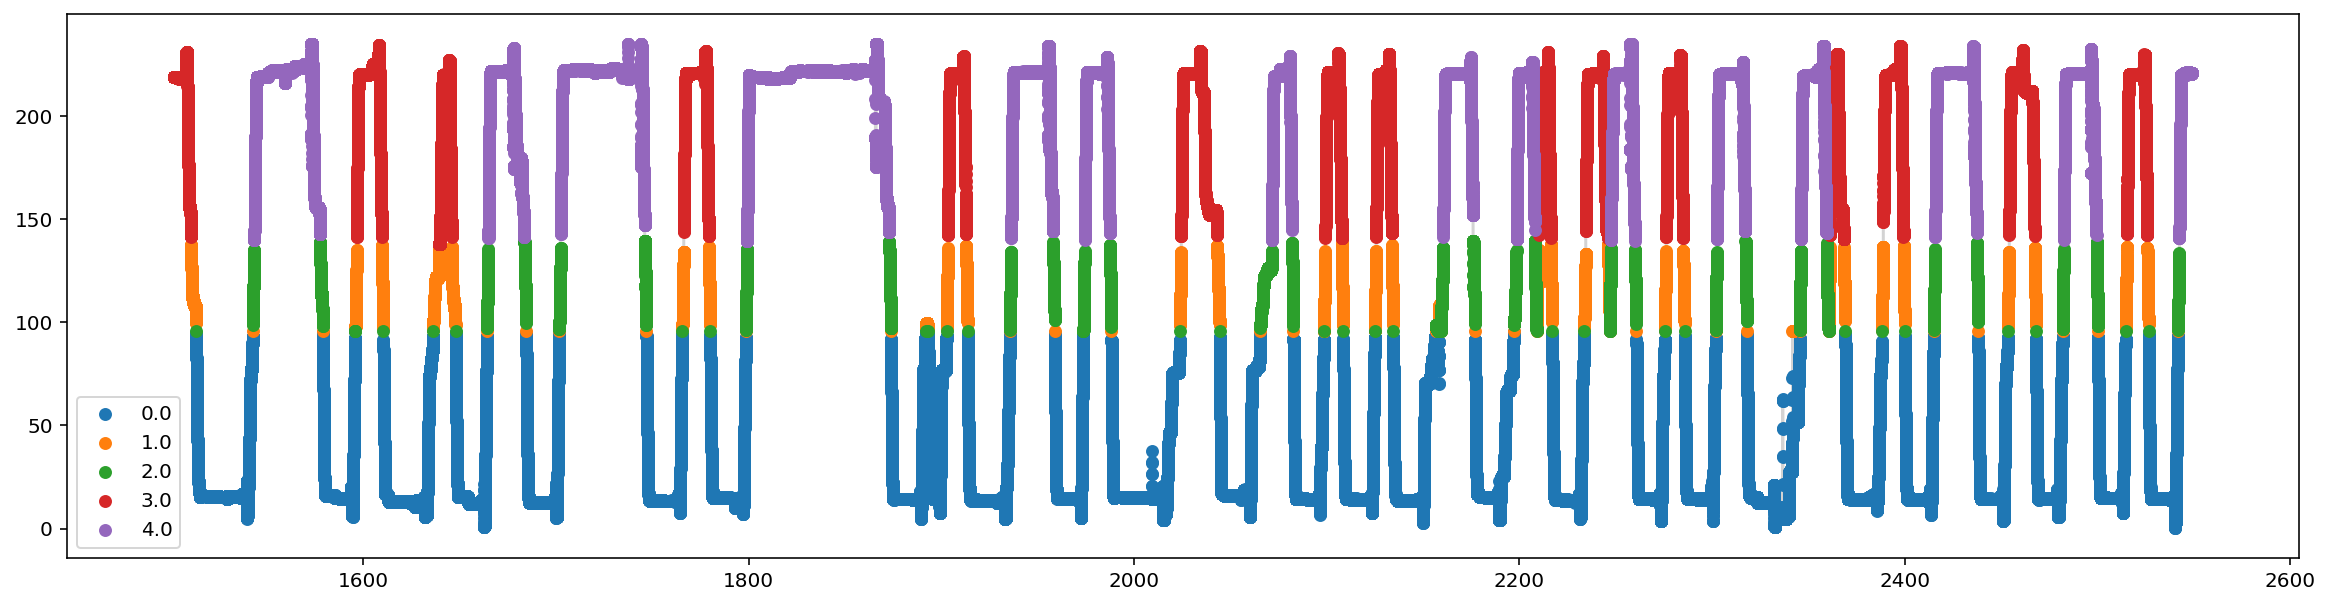

In [64]:
fig, ax = plt.subplots(figsize=(20, 5))

time = position_info.index / np.timedelta64(1, 's')
ax.plot(time, position_info.linear_distance, color='lightgrey', alpha=1, zorder=-1);
for edge_label, df in position_info.groupby('track_segment_id'):
    ax.scatter(df.index / np.timedelta64(1, 's'), df.linear_distance, s=30, label=edge_label)
plt.legend()

In [71]:
EDGE_ORDER = [0, 1, 3, 2, 4]
EDGE_SPACING = [15, 0, 15, 0]

position_info['linear_position'] = convert_linear_distance_to_linear_position(
    position_info.linear_distance.values,
    position_info.track_segment_id.values, EDGE_ORDER,
    spacing=EDGE_SPACING)

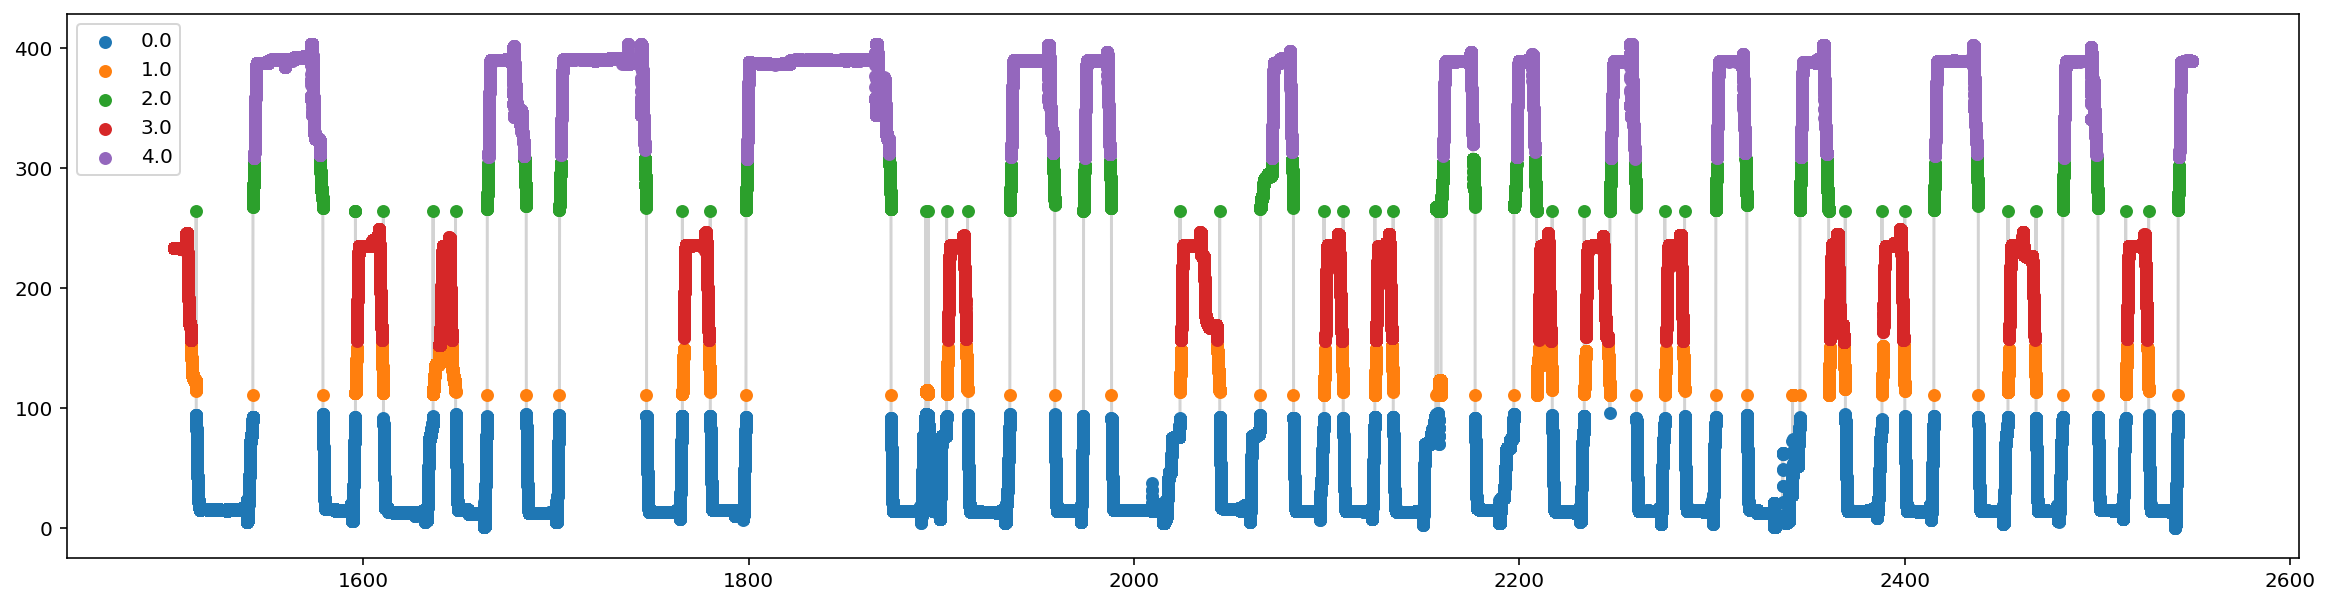

In [72]:
fig, ax = plt.subplots(figsize=(20, 5))

time = position_info.index / np.timedelta64(1, 's')
ax.plot(time, position_info.linear_position.values, color='lightgrey', alpha=1, zorder=-1);
for edge_label, df in position_info.groupby('track_segment_id'):
    ax.scatter(df.index / np.timedelta64(1, 's'), df.linear_position, s=30, label=edge_label)
plt.legend()